# Sequential Search

To simulate the sequential search behavior of a customer, let's play a game:

You will be given a random number $X$ between 0 and 10. Each time you are given a
random number, you can either:
- Accept it and be done with the game, or
- Reject it and ask for another random number between 0 and 10.
- Think of each number as “value.”

How is your final score calculated:
- When you accept a number, that is the value you got.
- You pay a fee of 3 each time asking for a new number (think of it as search effort).
- Your final score equals the value minus the total fee that you paid.

In [1]:
# Visualization / ML Libraries
from collections import namedtuple
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.font_manager as fm
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import seaborn as sns
from sklearn.datasets import make_spd_matrix

# plotting defaults
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = (18, 12)
get_colors = lambda length: plt.get_cmap('Spectral')(np.linspace(0, 1.0, length))

In [2]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = (18, 12)

---
# Game 1: 

<img src='sequential_search_example.png' />

Let's build a perfect player for this game:

1. We believe that the perfect player has a fixed cut-off $C$
    - If $X > C$, accept, Else, reject
    

2. We don't want to choose a $C$ that is too low, because we could potentially get a sufficiently high score in the next round that could offset the fee of 3 we need to pay to go to the next round. So how do we choose the optimal $C$? 
    1. We want to maximize the final score $S$ at the end of the game
    2. Let's maximize $\mathbb{E}[S] = \mathbb{E}[X] - \mathbb{E}[\text{Total Cost}]$
        1. Find $\mathbb{E}[X]$:
            - We will only accept $X$ if we get $X > C$, $\therefore \mathbb{E}[X] = \frac{10 + C}{2} \because X \sim Uniform(C, 10)$
        2. Find $\mathbb{E}[\text{Total Cost}]$:
            - $\mathbb{E}[\text{Total Cost}] = 3 \times \mathbb{E}[\text{Number of rounds till first success}] - 3$, the -3 because we don't pay a fee for the first round
            - Since each round can be seen as a Bernoulli trial, with success being $p = \frac{10 - C}{10}$, and we're interested in finding out $\mathbb{E}[\text{Number of rounds till first success}]$, which can be modelled by a Geometric Distribution:
                - $\mathbb{E}[\text{Number of rounds till first success}] = \frac{1}{p} = \frac{10}{10 - C}$
                - $\mathbb{E}[\text{Total Cost}] = \frac{30}{10 - C} - 3$

    5. Maximize $\mathbb{E}[S] = \frac{10 + C}{2} - \frac{30}{10 - C} + 3$:

$$
\begin{aligned}
\frac{d}{dC}\mathbb{E}[S] &= 0 \\
\frac{d}{dC}\Big(\frac{10 + C}{2} - \frac{30}{10 - C} + 3\Big) &= 0 \\
\frac{d}{dC}\frac{C^2+6C-100}{2C-20} &= 0 \\
\frac{C^2-20C+40}{2C^2-40C+20} &= 0 \\
C &= \frac {-b\pm {\sqrt {b^{2}-4ac}}}{2a} \\
&= \frac {20\pm {\sqrt {400-160}}}{2} \\
&= \frac {20\pm {\sqrt {240}}}{2} \\
&= 2.254\,\text{OR}\,17.745\,(\text{Reject}\because\text{Out of range})
\end{aligned}
$$

In [3]:
# Taking note of all the variables
# and values required
FEE = 3
C = np.arange(0, 5, 0.01)
E_S = lambda C: (((10+C)/2)-(FEE*10/(10-C))+FEE)
dE_SdC = lambda C: ((C**2)-(20*C)+40)/((2*C**2)-(40*C)+20)
opt_C = (20 - (240**0.5)) / 2
max_E_S = E_S(opt_C)

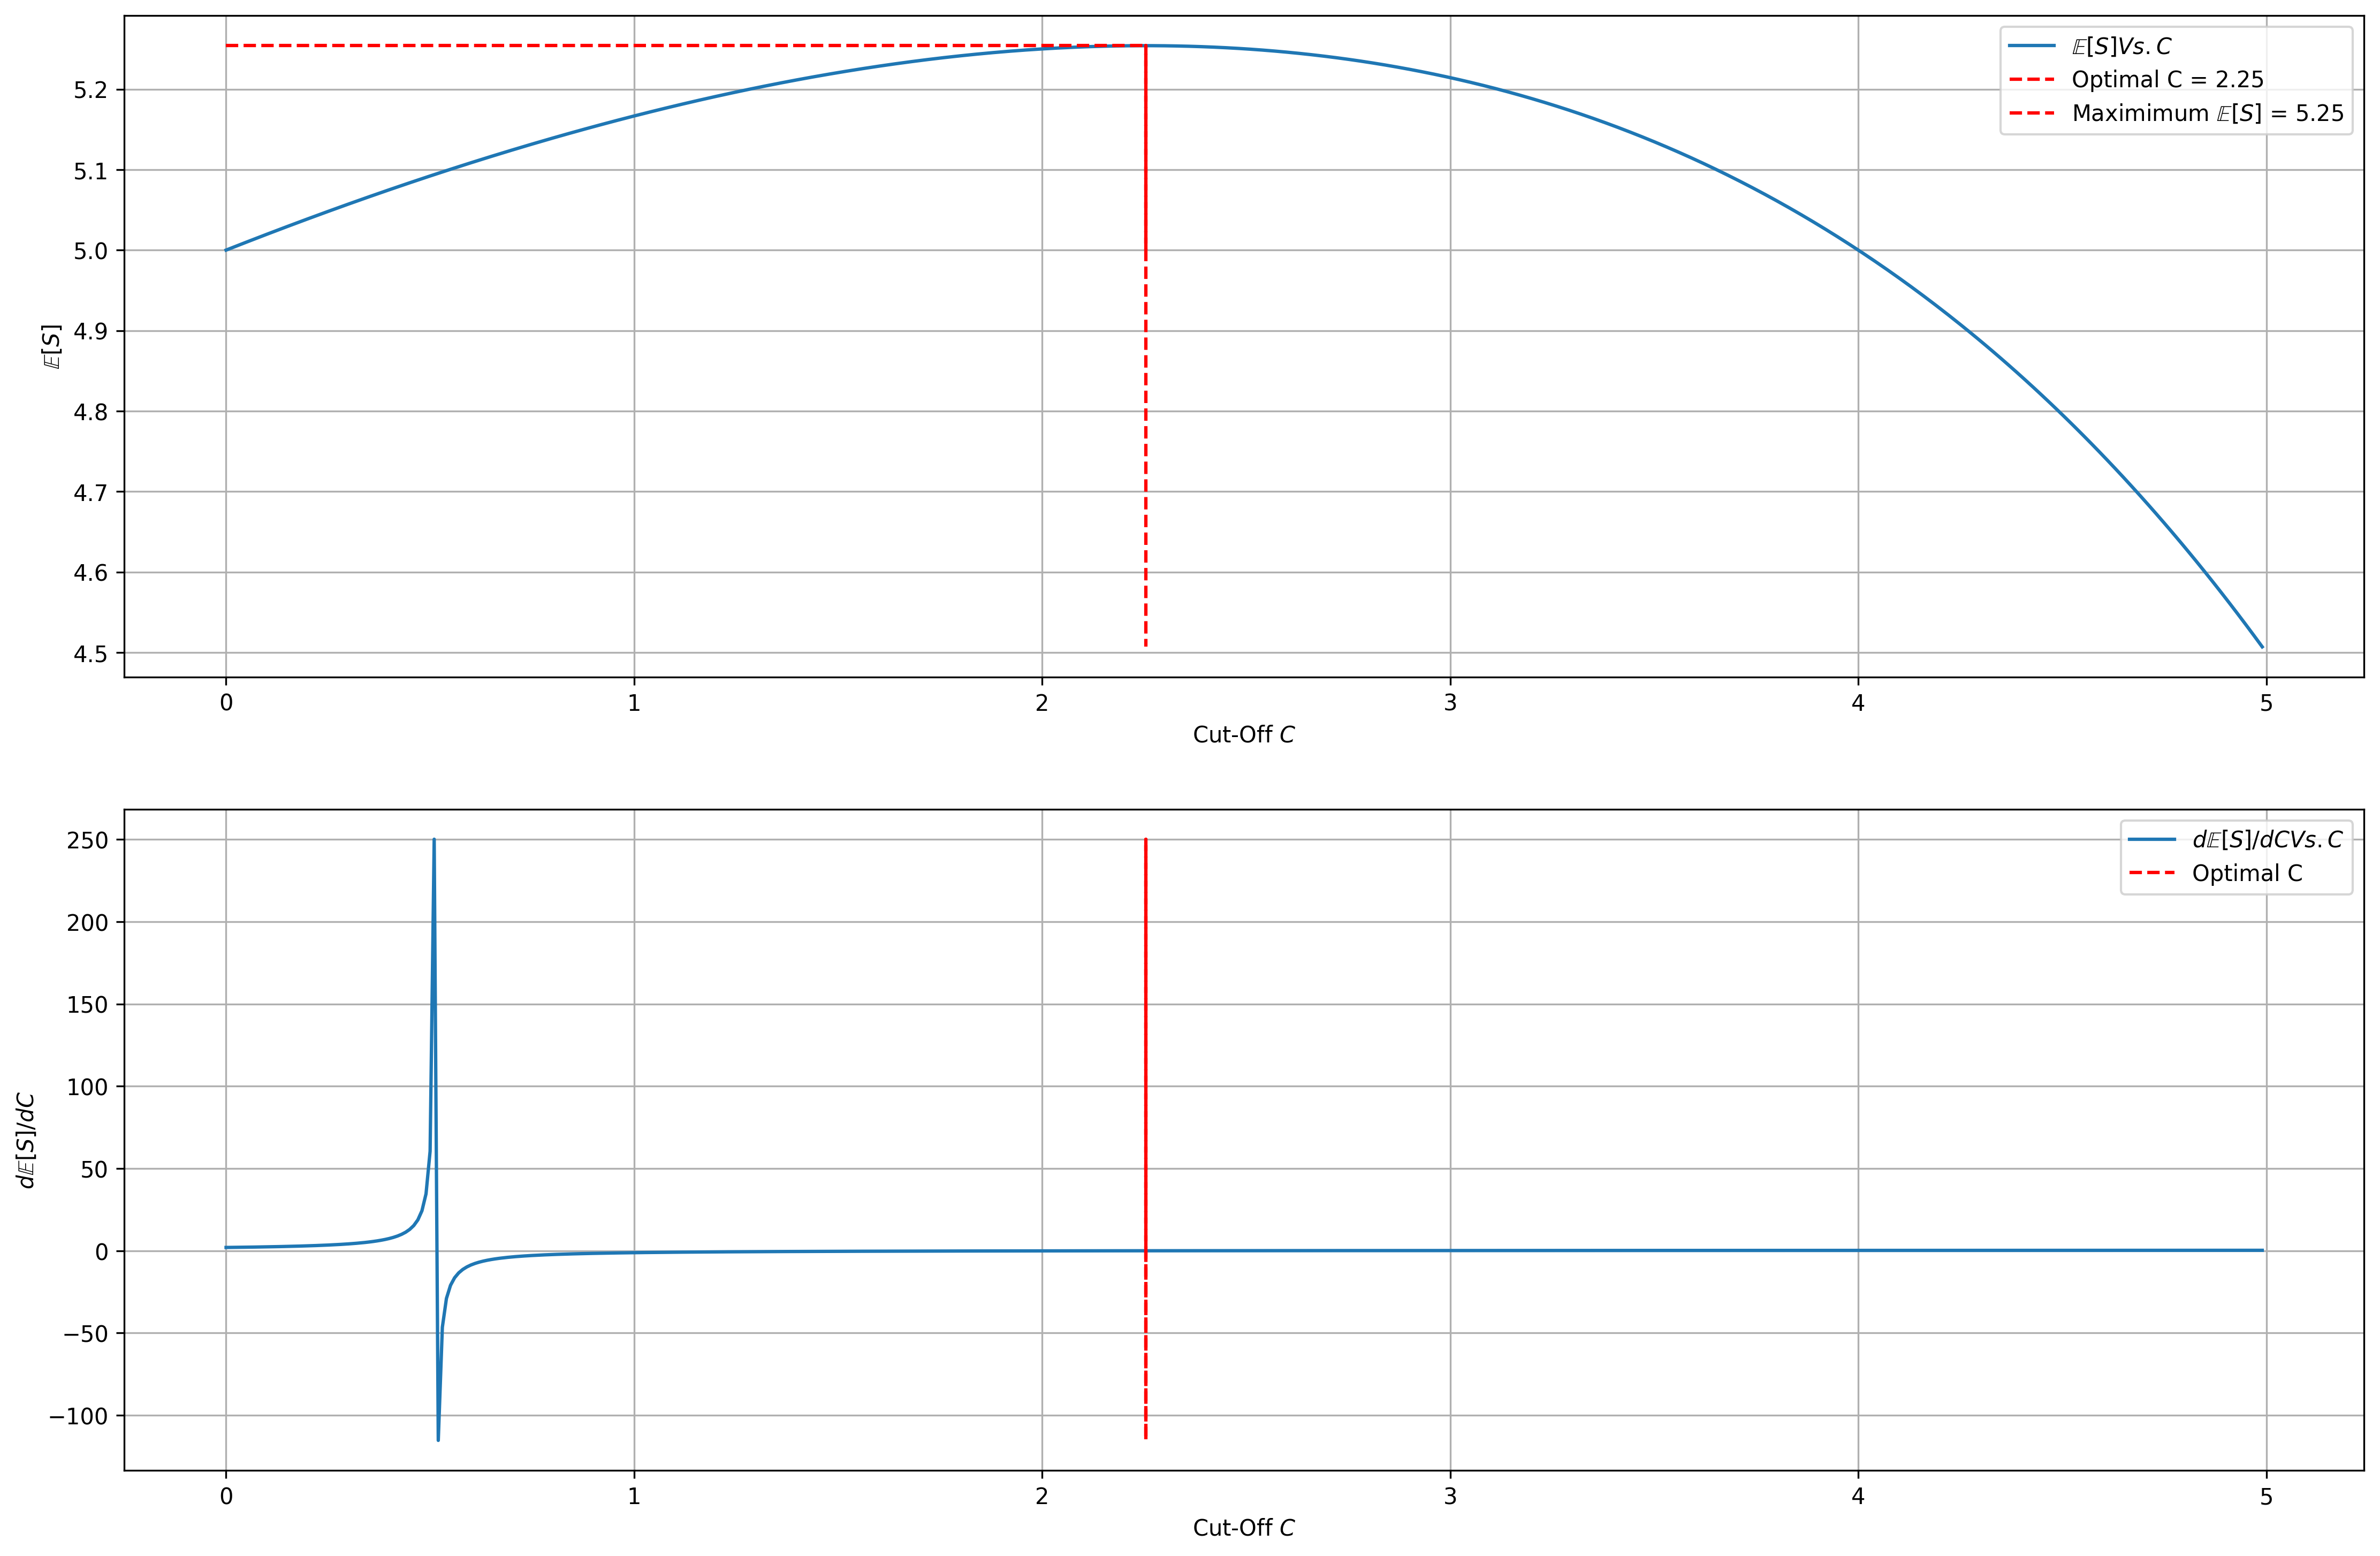

In [4]:
fig, ax = plt.subplots(2, 1)

ax[0].plot(C, E_S(C), label='$\mathbb{E}[S] Vs. C$')
ax[0].plot([opt_C]*len(C), E_S(C), 'r--', label='Optimal C = {}'.format(round(opt_C, 2)))
ax[0].plot(np.arange(0, opt_C, 0.01), [max_E_S]*len(np.arange(0, opt_C, 0.01)), 'r--', label='Maximimum $\mathbb{E}[S]$ = '+str(round(max_E_S, 2)))
ax[0].grid()
ax[0].set_xlabel('Cut-Off $C$')
ax[0].set_ylabel('$\mathbb{E}[S]$')
ax[0].legend()

ax[1].plot(C, dE_SdC(C), label='$d\mathbb{E}[S]/dC Vs. C$')
ax[1].plot([opt_C]*len(C), dE_SdC(C), 'r--', label='Optimal C')
ax[1].grid()
ax[1].set_xlabel('Cut-Off $C$')
ax[1].set_ylabel('$d\mathbb{E}[S]/dC$')
ax[1].legend()

plt.show();

In [5]:
print('Number of rounds we expect to play: {}'.format(round(10 / (10 - opt_C), 2)))

Number of rounds we expect to play: 1.29


We observe that we get a maxmimum expected final score of 5.25 as the perfect player, and an optimal cut-off of 2.25.

---
# Game 2: 

What if instead our fee is 2?

$$
\begin{aligned}
\frac{d}{dC}\mathbb{E}[S] &= 0 \\
\frac{d}{dC}\Big(\frac{10 + C}{2} - \frac{20}{10 - C} + 2\Big) &= 0 \\
\frac{d}{dC}\frac{0.5C^2+2C-50}{10-C} &= 0 \\
\frac{-0.5C^2+10C-30}{C^2-20C+100} &= 0 \\
C &= \frac {-b\pm {\sqrt {b^{2}-4ac}}}{2a} \\
&= 10\pm {\sqrt {100-60}} \\
&= 10\pm {\sqrt {40}} \\
&= 3.675\,\text{OR}\,16.325\,(\text{Reject}\because\text{Out of range})
\end{aligned}
$$

In [6]:
# Taking note of all the variables
# and values required
FEE = 2
C = np.arange(0, 5, 0.01)
E_S = lambda C: (((10+C)/2)-(FEE*10/(10-C))+FEE)
dE_SdC = lambda C: ((-0.5*(C**2))+(10*C)-30)/((C**2)-(20*C)+100)
opt_C = 10 - (40**0.5)
max_E_S = E_S(opt_C)

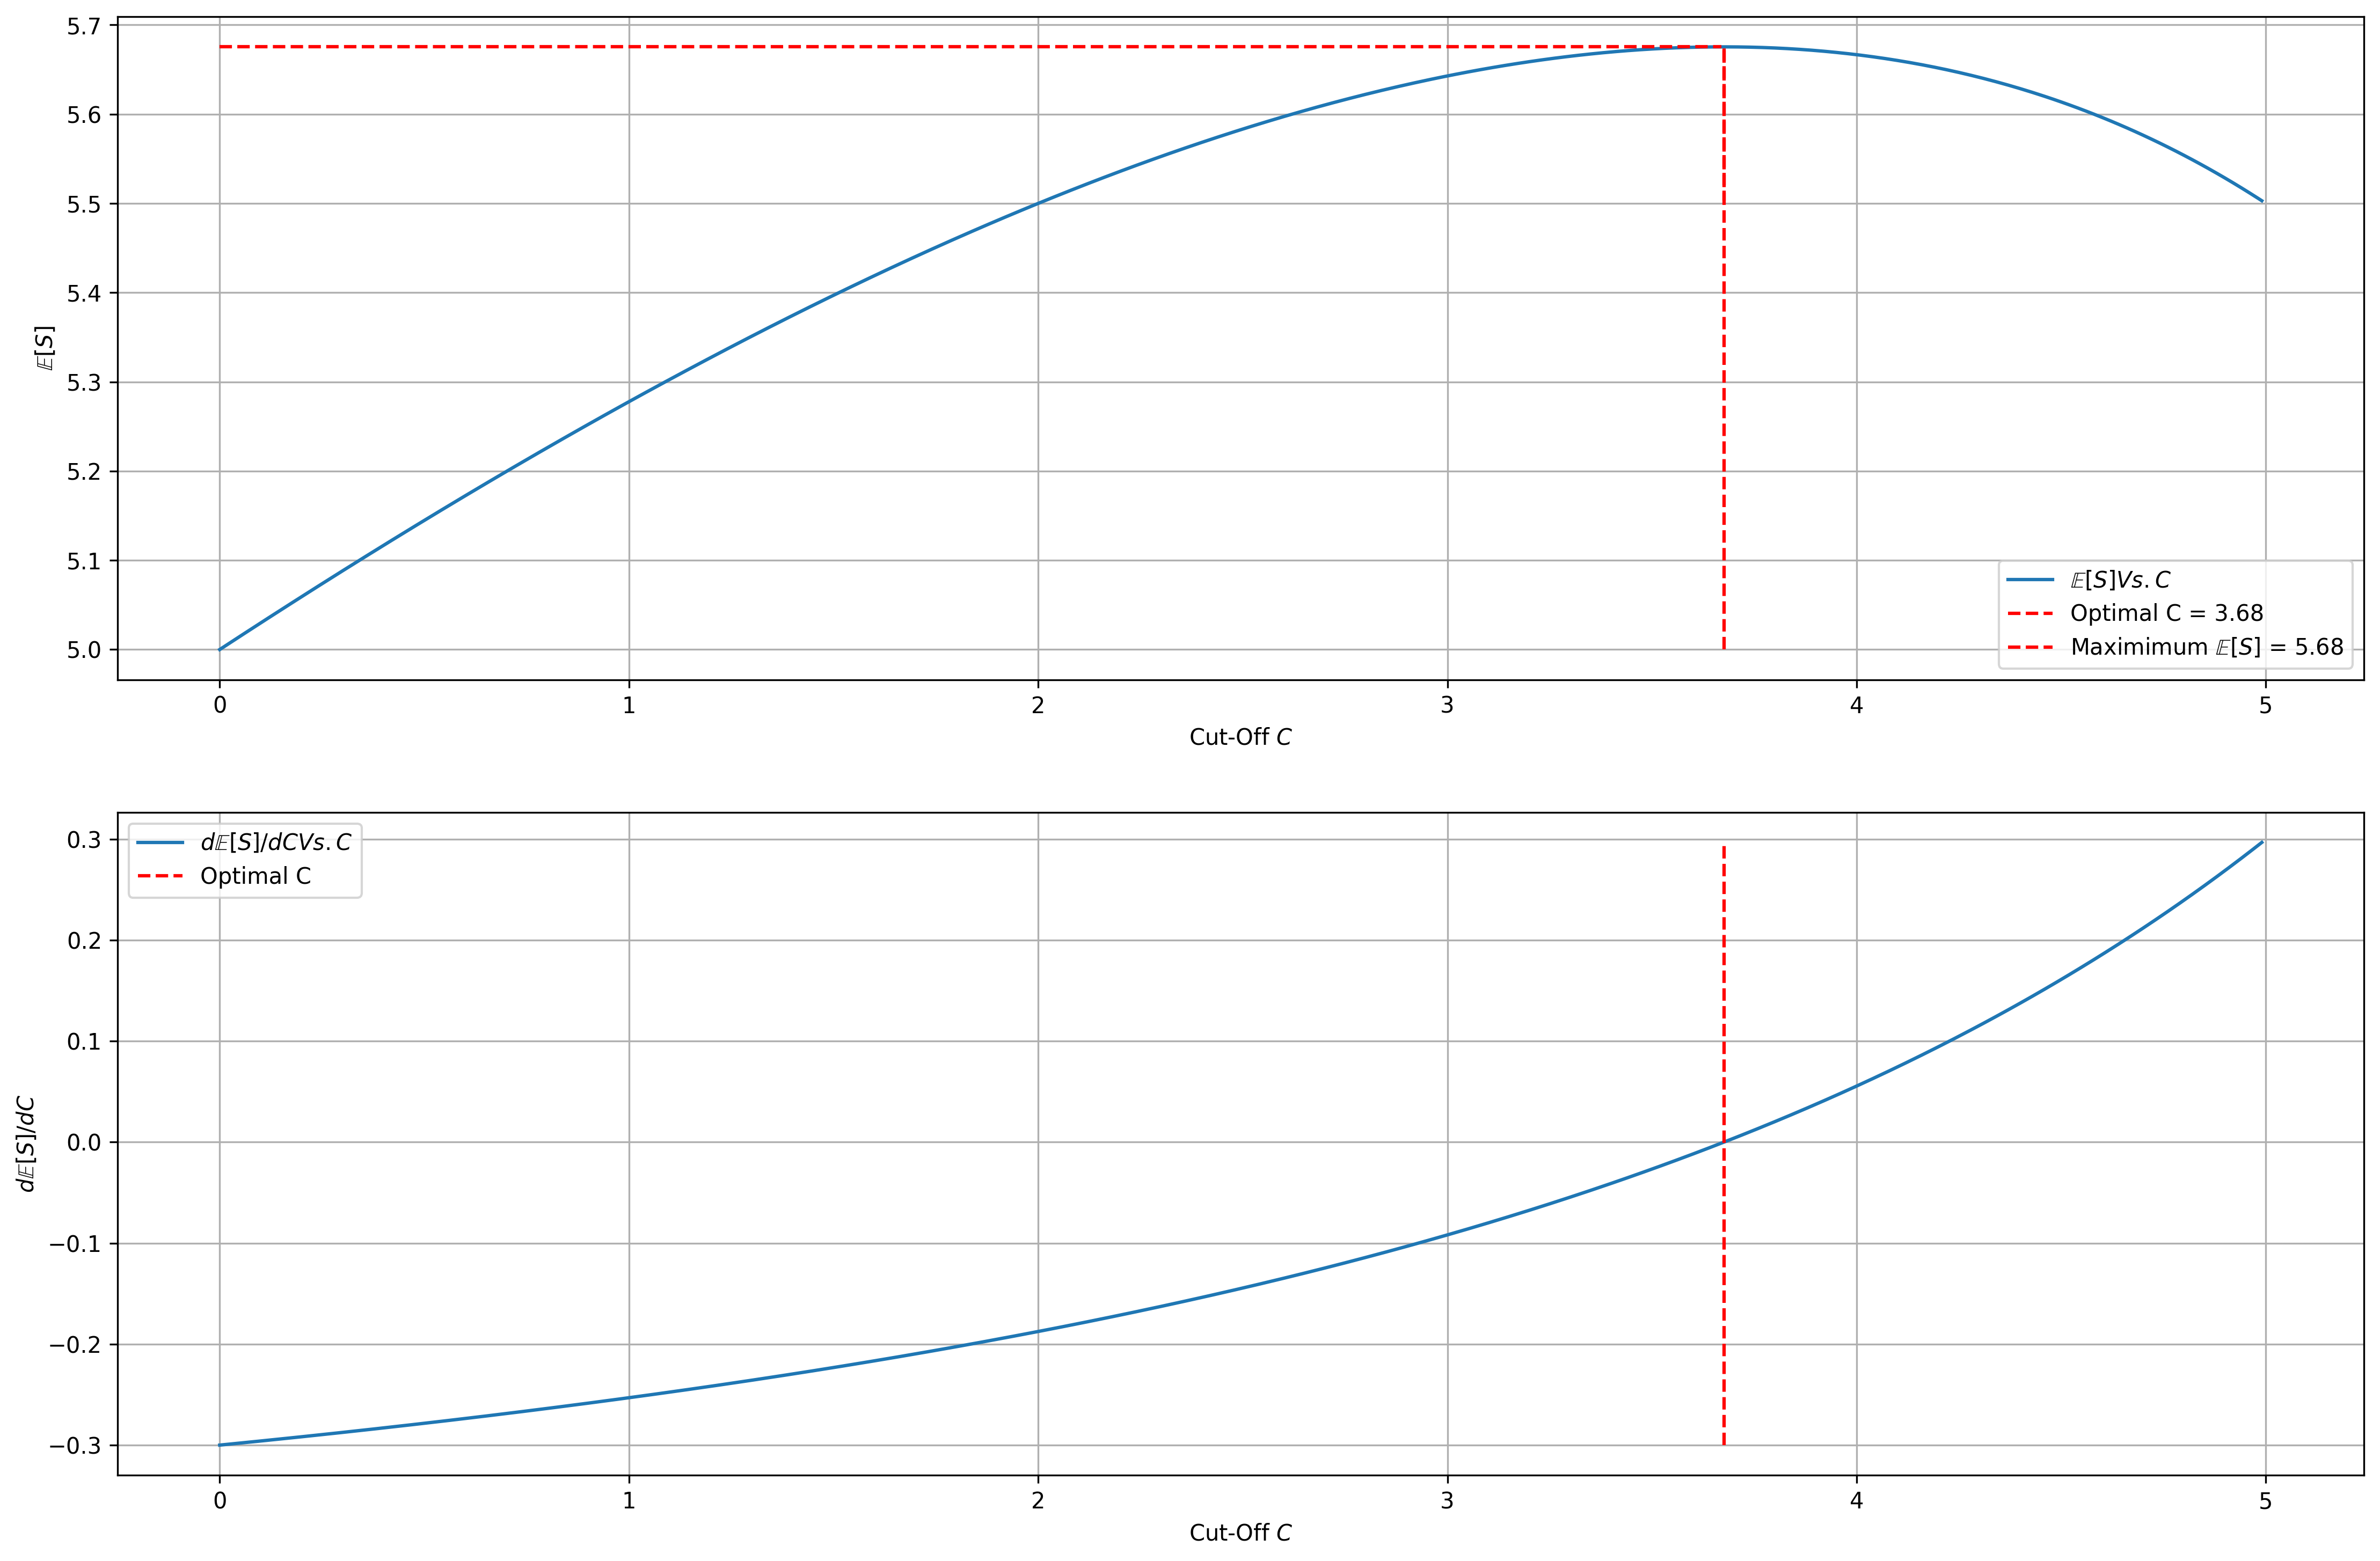

In [7]:
fig, ax = plt.subplots(2, 1)

ax[0].plot(C, E_S(C), label='$\mathbb{E}[S] Vs. C$')
ax[0].plot([opt_C]*len(C), E_S(C), 'r--', label='Optimal C = {}'.format(round(opt_C, 2)))
ax[0].plot(np.arange(0, opt_C, 0.01), [max_E_S]*len(np.arange(0, opt_C, 0.01)), 'r--', label='Maximimum $\mathbb{E}[S]$ = '+str(round(max_E_S, 2)))
ax[0].grid()
ax[0].set_xlabel('Cut-Off $C$')
ax[0].set_ylabel('$\mathbb{E}[S]$')
ax[0].legend()

ax[1].plot(C, dE_SdC(C), label='$d\mathbb{E}[S]/dC Vs. C$')
ax[1].plot([opt_C]*len(C), dE_SdC(C), 'r--', label='Optimal C')
ax[1].grid()
ax[1].set_xlabel('Cut-Off $C$')
ax[1].set_ylabel('$d\mathbb{E}[S]/dC$')
ax[1].legend()

plt.show();

In [8]:
print('Number of rounds we expect to play: {}'.format(round(10 / (10 - opt_C), 2)))

Number of rounds we expect to play: 1.58


We observe that we get a maxmimum expected final score of 5.68 as the perfect player > 5.25 in the previous game, and an optimal cut-off of 3.68 > 2.25 in the previous game. We see that when the fee decreases, our cut-off increases as well as our maximum expected payout. The number of rounds we expect to play also increases from 1.29 to 1.58.

---
# Game 3: 

What if instead, $-5 \leq X \leq 15$ instead?

$$
\begin{aligned}
\frac{d}{dC}\mathbb{E}[S] &= 0 \\
\frac{d}{dC}\Big(\frac{15 + C}{2} - \frac{60}{15 - C} + 3\Big) &= 0 \\
\frac{d}{dC}\frac{0.5C^2+3C-97.5}{15-C} &= 0 \\
\frac{-0.5C^2+15C-52.5}{C^2-30C+225} &= 0 \\
C &= \frac {-b\pm {\sqrt {b^{2}-4ac}}}{2a} \\
&= 15\pm {\sqrt {225-105}} \\
&= 15\pm {\sqrt {120}} \\
&= 4.046\,\text{OR}\,25.954\,(\text{Reject}\because\text{Out of range})
\end{aligned}
$$

In [9]:
# Taking note of all the variables
# and values required
FEE = 3
C = np.arange(0, 5, 0.01)
E_S = lambda C: (((15+C)/2)-(FEE*20/(15-C))+FEE)
dE_SdC = lambda C: ((-0.5*(C**2))+(15*C)-52.5)/((C**2)-(30*C)+225)
opt_C = 15 - (120**0.5)
max_E_S = E_S(opt_C)

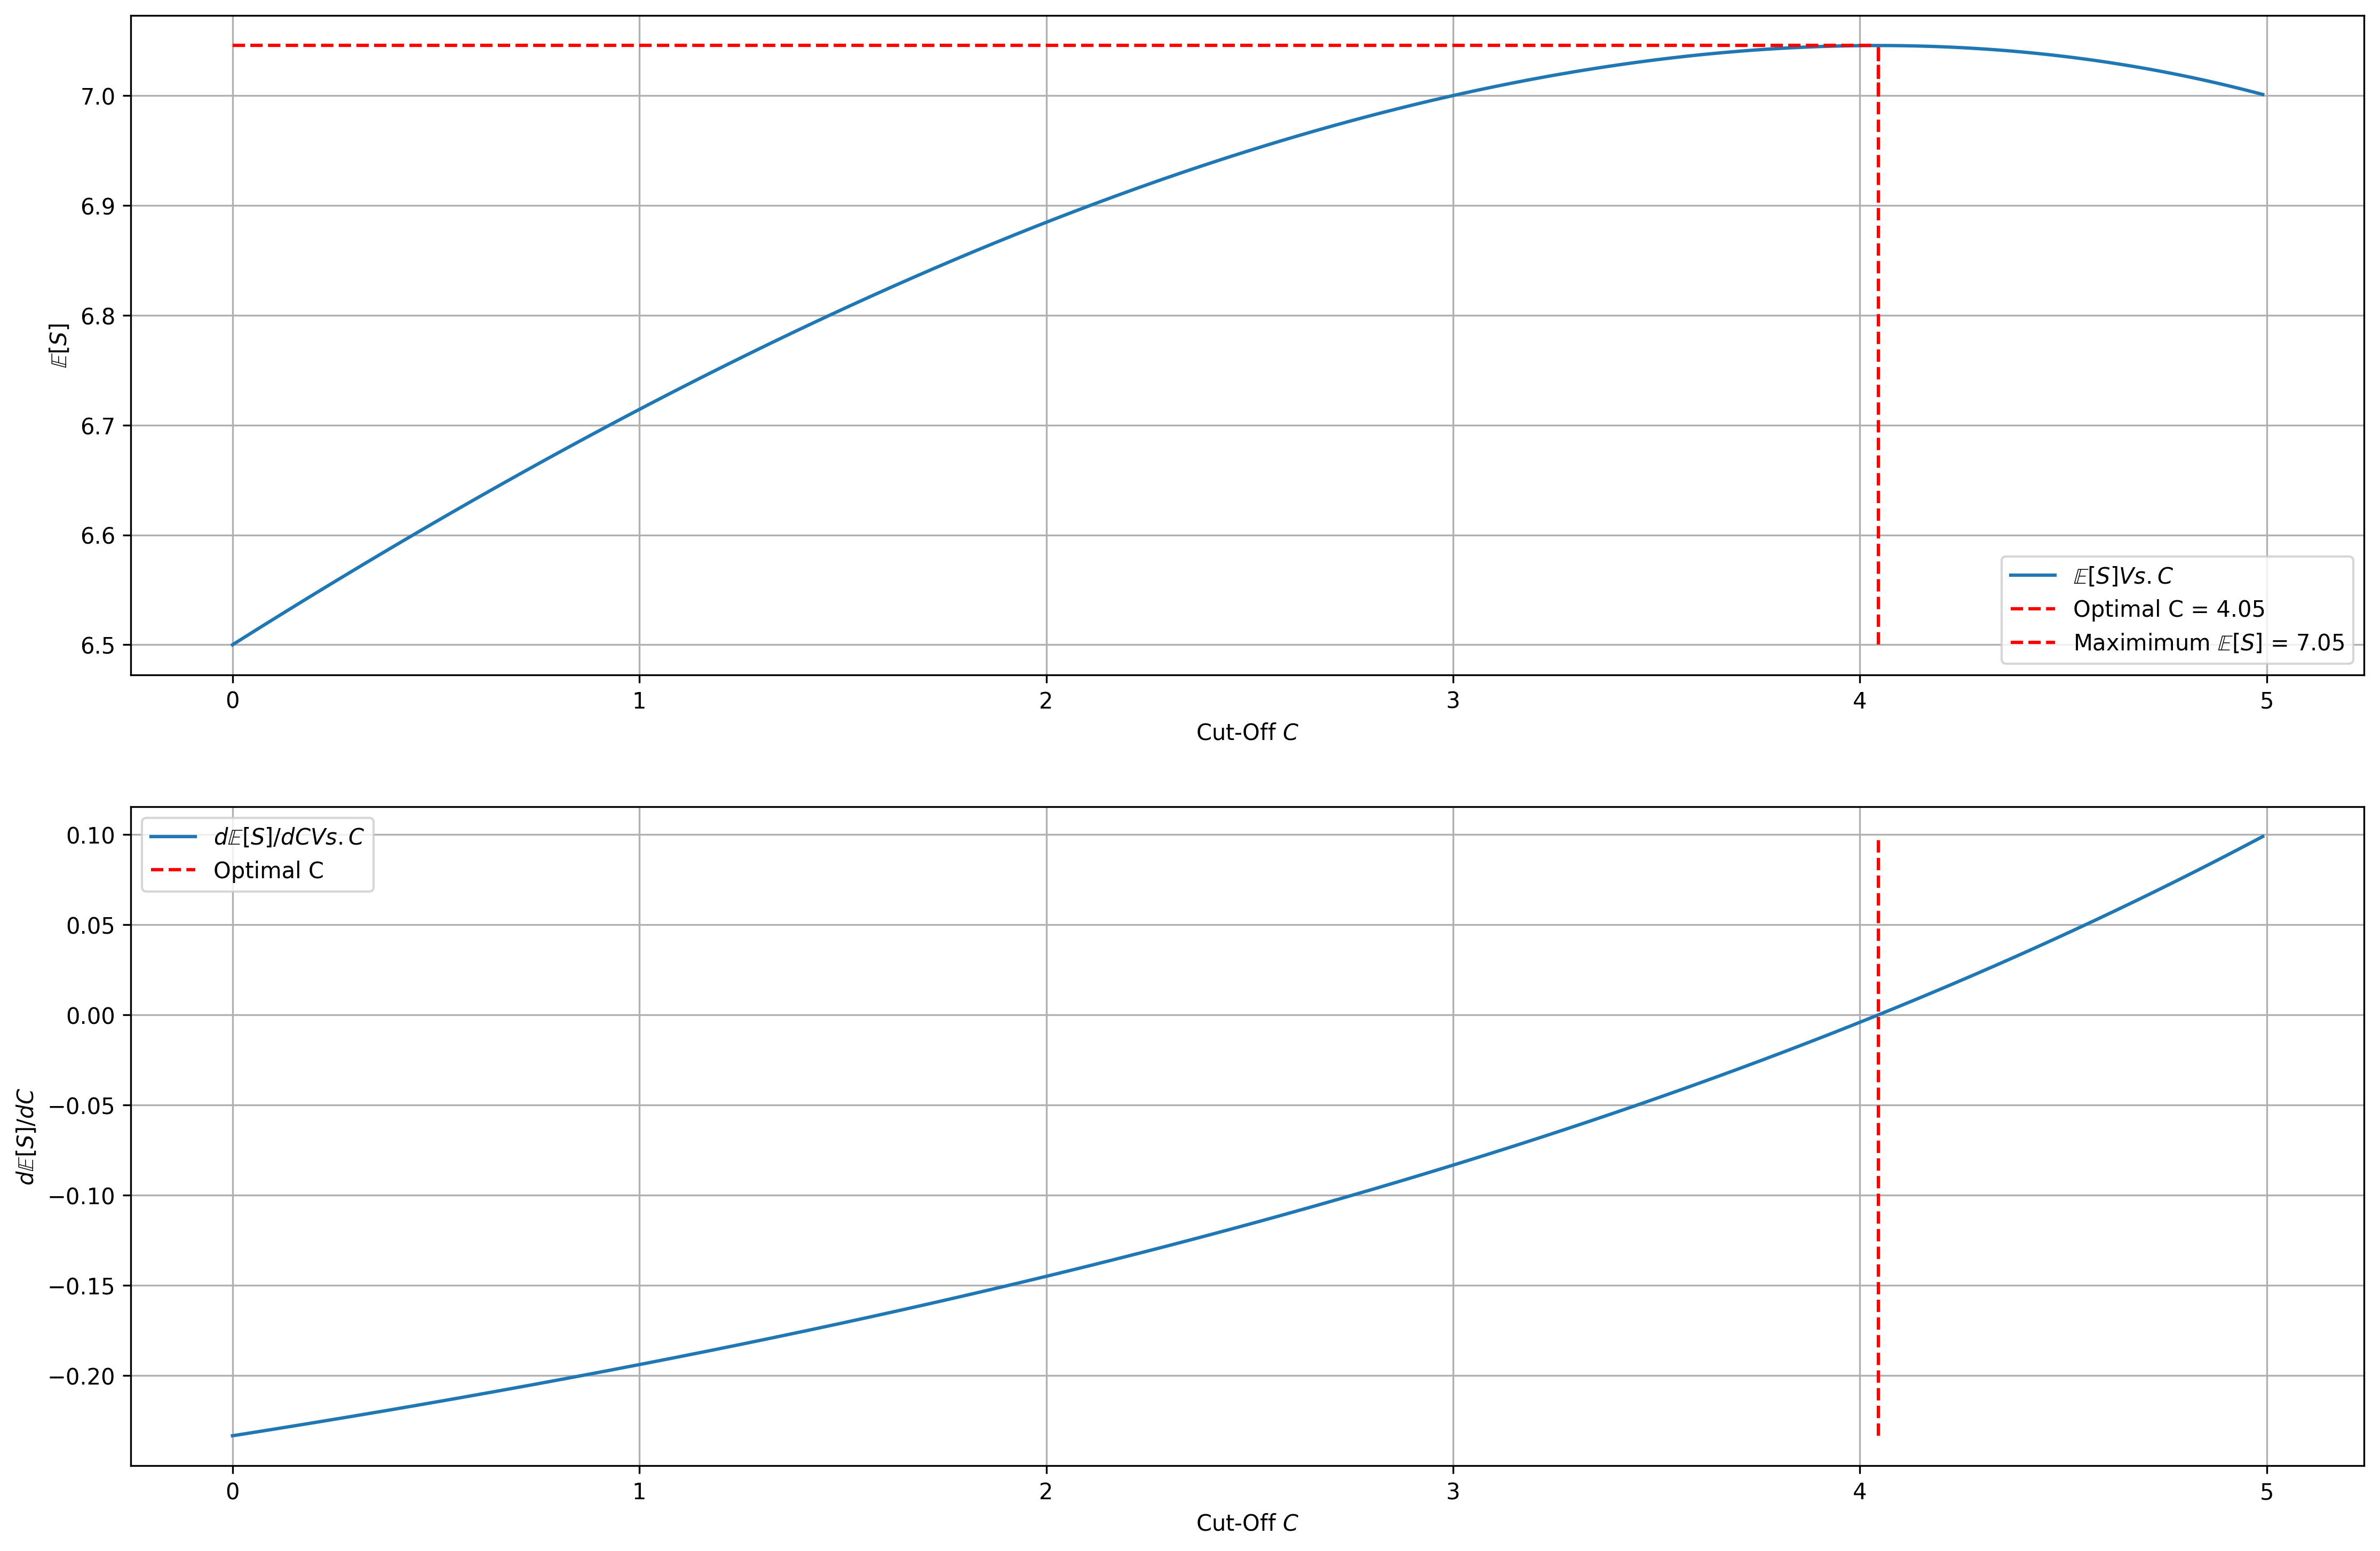

In [10]:
fig, ax = plt.subplots(2, 1)

ax[0].plot(C, E_S(C), label='$\mathbb{E}[S] Vs. C$')
ax[0].plot([opt_C]*len(C), E_S(C), 'r--', label='Optimal C = {}'.format(round(opt_C, 2)))
ax[0].plot(np.arange(0, opt_C, 0.01), [max_E_S]*len(np.arange(0, opt_C, 0.01)), 'r--', label='Maximimum $\mathbb{E}[S]$ = '+str(round(max_E_S, 2)))
ax[0].grid()
ax[0].set_xlabel('Cut-Off $C$')
ax[0].set_ylabel('$\mathbb{E}[S]$')
ax[0].legend()

ax[1].plot(C, dE_SdC(C), label='$d\mathbb{E}[S]/dC Vs. C$')
ax[1].plot([opt_C]*len(C), dE_SdC(C), 'r--', label='Optimal C')
ax[1].grid()
ax[1].set_xlabel('Cut-Off $C$')
ax[1].set_ylabel('$d\mathbb{E}[S]/dC$')
ax[1].legend()

plt.show();

In [11]:
print('Number of rounds we expect to play: {}'.format(round(10 / (10 - opt_C), 2)))

Number of rounds we expect to play: 1.68


We observe that we get a maxmimum expected final score of 7.05 as the perfect player > 5.25 in the game 1, and an optimal cut-off of 4.05 > 2.25 in game 1. We see that when the range of possible payout increases, our cut-off increases as well as our maximum expected payout. The number of rounds we expect to play also increases from 1.29 to 1.68. The range of the payout can be interpreted as the risk associated with the game. The higher the risk, higher the payout.